<a href="https://colab.research.google.com/github/CaritoRamos/text-mining-project-in-python/blob/main/TextMiningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Text Mining "Analisis de un Libro"**

# **1. Librerías**

In [1]:
#!pip install PyPDF2
!pip install textblob   #Análisis de sentimiento
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm #para descargar e instalar el modelo de lenguaje en inglés proporcionado por SpaCy. (https://spacy.io/models/en)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 54.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
#Para la lectura de un documento pdf en drive:
#from google.colab import drive

#Para la lectura del texto en pdf
#from PyPDF2 import PdfReader (en pdf)
import spacy

#Para trabajar con archivos y directorios en el sistema operativo
#import os

#Para buscar y manipular patrones de texto en cadenas de caracteres (búsqueda, extracción, reemplazo y manipulación)
#import re

#Para la limpieza del texto
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')  #Para poder filtrar los nombres de personas

#Para tokenizar el texto:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import gutenberg
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('gutenberg')
nltk.download('words')

#Para el análisis de sentimiento
import string
from textblob import TextBlob

#Para graficar
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Para generar una nube de palabras
from wordcloud import WordCloud

#Para identificar la función gramatical de las palabras:
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# **2. Carga del Texto**

In [3]:
libros=gutenberg.fileids()
print(libros)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [4]:
ruta="carroll-alice.txt"
libro=nltk.corpus.gutenberg.words(ruta)
print(libro)
print(len(libro))  #Cantidad de palabras

['[', 'Alice', "'", 's', 'Adventures', 'in', ...]
34110


Con el método words hemos podido acceder a las palabras del libro (que almacenaron en la variable libro). A la última línea hemos contado las posiciones de la lista libro, es decir, el número de palabras del libro. En corpus de texto como este podemos acceder a:

- al texto en bruto, con el método raw
- los párrafos, con el método paras
- a las oraciones, con el método sents
- a las palabras, con el método words

# **3. Exploración de la Data**

In [5]:
print("TEXTO EN BRUTO")
texto_en_bruto=nltk.corpus.gutenberg.raw(ruta)
#print(texto_en_bruto[0:100000])
print(texto_en_bruto)

TEXTO EN BRUTO
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quit

In [6]:
print("PÁRRAFOS")
parrafos=nltk.corpus.gutenberg.paras(ruta)
for para in parrafos:
    print(para)

PÁRRAFOS
[['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']']]
[['CHAPTER', 'I', '.'], ['Down', 'the', 'Rabbit', '-', 'Hole']]
[['Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'"]]
[['So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', '),', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy', '-', 'chain', 'would', 'be', 'worth', 'the', 'trouble', 

In [7]:
print("ORACIONES")
oraciones=nltk.corpus.gutenberg.sents(ruta)
for oracion in oraciones:
    print(oracion)

ORACIONES
['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']']
['CHAPTER', 'I', '.']
['Down', 'the', 'Rabbit', '-', 'Hole']
['Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'"]
['So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', '),', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy', '-', 'chain', 'would', 'be', 'worth', 'the', 'trouble', 'of', '

In [8]:
print("PALABRAS")
palabras=nltk.corpus.gutenberg.words(ruta)
for palabra in palabras:
    print(palabra)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
court
of
justice
before
,
but
she
had
read
about
them
in
books
,
and
she
was
quite
pleased
to
find
that
she
knew
the
name
of
nearly
everything
there
.
'
That
'
s
the
judge
,'
she
said
to
herself
,
'
because
of
his
great
wig
.'
The
judge
,
by
the
way
,
was
the
King
;
and
as
he
wore
his
crown
over
the
wig
,
(
look
at
the
frontispiece
if
you
want
to
see
how
he
did
it
,)
he
did
not
look
at
all
comfortable
,
and
it
was
certainly
not
becoming
.
'
And
that
'
s
the
jury
-
box
,'
thought
Alice
,
'
and
those
twelve
creatures
,'
(
she
was
obliged
to
say
'
creatures
,'
you
see
,
because
some
of
them
were
animals
,
and
some
were
birds
,)
'
I
suppose
they
are
the
jurors
.'
She
said
this
last
word
two
or
three
times
over
to
herself
,
being
rather
proud
of
it
:
for
she
thought
,
and
rightly
too
,
that
very
few
little
girls
of
her
age
knew
the
meaning
of
it
at
all
.
However
,
'
jury
-
men
'
would
have
done
just
as
well
.
The
twelve
juro

In [9]:
len(palabras)  #cantidad de palabras

34110

In [10]:
print(type(libro))

<class 'nltk.corpus.reader.util.StreamBackedCorpusView'>


También se puede hacer con la librería Spacy

In [11]:
print("TEXTO EN BRUTO")
#Para obtener el texto del libro en bruto
libro=nltk.corpus.gutenberg.raw(ruta)

#Para procesar el texto con SpaCy
print("PROCESAMIENTO CON SPACY")
nlp = spacy.load("en_core_web_sm") #modelo para inglés
contenido = nlp(libro)
print(contenido)

TEXTO EN BRUTO
PROCESAMIENTO CON SPACY
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the

In [12]:
#Tokenizamos el texto en oraciones y palabras
oraciones_sp = sent_tokenize(libro)
palabras_sp = word_tokenize(libro)
print(oraciones)
print(palabras)

[['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']'], ['CHAPTER', 'I', '.'], ...]
['[', 'Alice', "'", 's', 'Adventures', 'in', ...]


In [13]:
#Podemos calcular la longitud promedio de las oraciones
longitudes_oraciones = [len(sent.split()) for sent in oraciones_sp]
longitud_promedio_oraciones = sum(longitudes_oraciones) / len(oraciones_sp)

print("Longitud promedio de las oraciones:", longitud_promedio_oraciones)

Longitud promedio de las oraciones: 16.277538461538462


# **4. Limpieza del Texto**

In [14]:
#Cambiamos todas las palabras a minúsculas:
palabras_minusculas = [palabra.lower() for palabra in palabras]
print(len(palabras_minusculas))
print(palabras_minusculas)

34110
['[', 'alice', "'", 's', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit', '-', 'hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', '),', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy', '-', 'chain', 'would', 'be', 'worth', 'the', 'trouble', 'of', 'getting'

In [15]:
#Lematizamos las palabras:
lemmatizer = WordNetLemmatizer()
palabras_lematizadas = [lemmatizer.lemmatize(palabra) for palabra in palabras_minusculas]
print(len(palabras_lematizadas))
print(palabras_lematizadas)

34110
['[', 'alice', "'", 's', 'adventure', 'in', 'wonderland', 'by', 'lewis', 'carroll', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit', '-', 'hole', 'alice', 'wa', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'wa', 'reading', ',', 'but', 'it', 'had', 'no', 'picture', 'or', 'conversation', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'alice', "'", 'without', 'picture', 'or', 'conversation', "?'", 'so', 'she', 'wa', 'considering', 'in', 'her', 'own', 'mind', '(', 'a', 'well', 'a', 'she', 'could', ',', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', '),', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy', '-', 'chain', 'would', 'be', 'worth', 'the', 'trouble', 'of', 'getting', 'up', '

In [16]:
#Eliminamos los stopwords y aquellas palabras que tengan menos de dos letras ya que no serán significativas para el presente análisis:
stop_words = set(stopwords.words('english'))
palabras_limpias= [palabra for palabra in palabras_lematizadas if palabra not in stop_words and len(palabra) > 2]
print(len(palabras_limpias))
print(palabras_limpias)

12245
['alice', 'adventure', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'picture', 'conversation', 'use', 'book', 'thought', 'alice', 'without', 'picture', 'conversation', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'pleasure', 'making', 'daisy', 'chain', 'would', 'worth', 'trouble', 'getting', 'picking', 'daisy', 'suddenly', 'white', 'rabbit', 'pink', 'eye', 'ran', 'close', 'nothing', 'remarkable', 'alice', 'think', 'much', 'way', 'hear', 'rabbit', 'say', 'dear', 'dear', 'shall', 'late', 'thought', 'afterwards', 'occurred', 'ought', 'wondered', 'time', 'seemed', 'quite', 'natural', 'rabbit', 'actually', 'took', 'watch', 'waistcoat', 'pocket', 'looked', 'hurried', 'alice', 'started', 'foot', 'flashed', 'across', 'mind', 'never', 'seen', 'rabbit', 'either', 'waistcoat', 'pocket',

Stopwords consideradas por NLTK

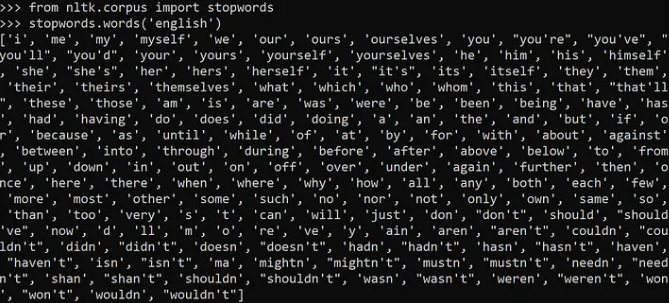

# **5. Frecuencia de Palabras**

In [17]:
#Para conocer la frecuencia de las palabras filtradas
def contar_elementos(texto):
    frecuencia_elementos = {}  #diccionario para almacenar las frecuencias de los elementos
    for palabra in palabras_limpias:
        if palabra in frecuencia_elementos:  #Si la palabra ya está en el diccionario, incrementar su frecuencia
            frecuencia_elementos[palabra] += 1
        else:  #Si la palabra no está en el diccionario, se inicializa su frecuencia en 1
            frecuencia_elementos[palabra] = 1
    return frecuencia_elementos

frecuencia = contar_elementos(palabras_limpias)
print(frecuencia)

{'alice': 398, 'adventure': 7, 'wonderland': 3, 'lewis': 1, 'carroll': 1, '1865': 1, 'chapter': 12, 'rabbit': 52, 'hole': 5, 'beginning': 14, 'get': 46, 'tired': 7, 'sitting': 10, 'sister': 11, 'bank': 4, 'nothing': 34, 'twice': 5, 'peeped': 3, 'book': 13, 'reading': 3, 'picture': 5, 'conversation': 11, 'use': 18, 'thought': 76, 'without': 26, 'considering': 3, 'mind': 11, 'well': 63, 'could': 77, 'hot': 7, 'day': 33, 'made': 30, 'feel': 8, 'sleepy': 5, 'stupid': 6, 'whether': 11, 'pleasure': 2, 'making': 8, 'daisy': 2, 'chain': 2, 'would': 83, 'worth': 4, 'trouble': 6, 'getting': 22, 'picking': 2, 'suddenly': 13, 'white': 30, 'pink': 1, 'eye': 36, 'ran': 16, 'close': 13, 'remarkable': 2, 'think': 53, 'much': 51, 'way': 57, 'hear': 14, 'say': 55, 'dear': 32, 'shall': 25, 'late': 6, 'afterwards': 2, 'occurred': 2, 'ought': 14, 'wondered': 1, 'time': 77, 'seemed': 27, 'quite': 55, 'natural': 4, 'actually': 1, 'took': 24, 'watch': 8, 'waistcoat': 2, 'pocket': 7, 'looked': 45, 'hurried': 1

In [18]:
#Para ordenar el diccionario por valores (frecuencias) de mayor a menor
frecuencia_ordenada = sorted(frecuencia.items(), key=lambda x: x[1], reverse=True)

#Se construye un nuevo diccionario a partir de la lista de tuplas ordenada
frecuencia_ordenada_diccionario = {k: v for k, v in frecuencia_ordenada}

print(frecuencia_ordenada_diccionario)

{'said': 462, 'alice': 398, 'little': 128, 'one': 105, 'know': 90, 'like': 86, 'would': 83, 'went': 83, 'thing': 80, 'could': 77, 'time': 77, 'thought': 76, 'queen': 76, 'see': 67, 'king': 64, 'well': 63, 'turtle': 61, 'head': 60, 'began': 58, 'way': 57, 'hatter': 57, 'mock': 56, 'say': 55, 'quite': 55, 'gryphon': 55, 'think': 53, 'rabbit': 52, 'much': 51, 'first': 51, "--'": 51, 'voice': 51, 'cat': 50, 'never': 48, 'come': 48, 'mouse': 48, 'get': 46, 'looked': 45, 'got': 45, 'must': 44, 'duchess': 42, 'tone': 42, 'round': 41, 'came': 40, 'back': 40, 'two': 40, 'dormouse': 40, 'great': 39, 'make': 38, 'eye': 36, 'nothing': 34, 'tell': 34, 'march': 34, 'day': 33, 'large': 33, 'hand': 33, 'last': 33, 'dear': 32, 'found': 32, 'right': 32, 'long': 32, 'door': 32, 'minute': 32, 'looking': 32, 'moment': 31, 'put': 31, 'word': 31, 'hare': 31, 'made': 30, 'white': 30, 'next': 30, 'heard': 30, 'foot': 29, 'look': 29, 'replied': 29, 'might': 28, 'three': 28, 'caterpillar': 28, 'seemed': 27, 'goi

In [19]:
#Se extraen las palabras y sus frecuencias
df_plot = pd.DataFrame({"palabras": list(frecuencia_ordenada_diccionario.keys()),
           "frecuencias":list(frecuencia_ordenada_diccionario.values())})
df_top_50 = df_plot.head(50)   #Vamos a visualizar unicamente las 50 primeras
df_top_50

,palabras,frecuencias
0,said,462
1,alice,398
2,little,128
3,one,105
4,know,90
5,like,86
6,would,83
7,went,83
8,thing,80
9,could,77


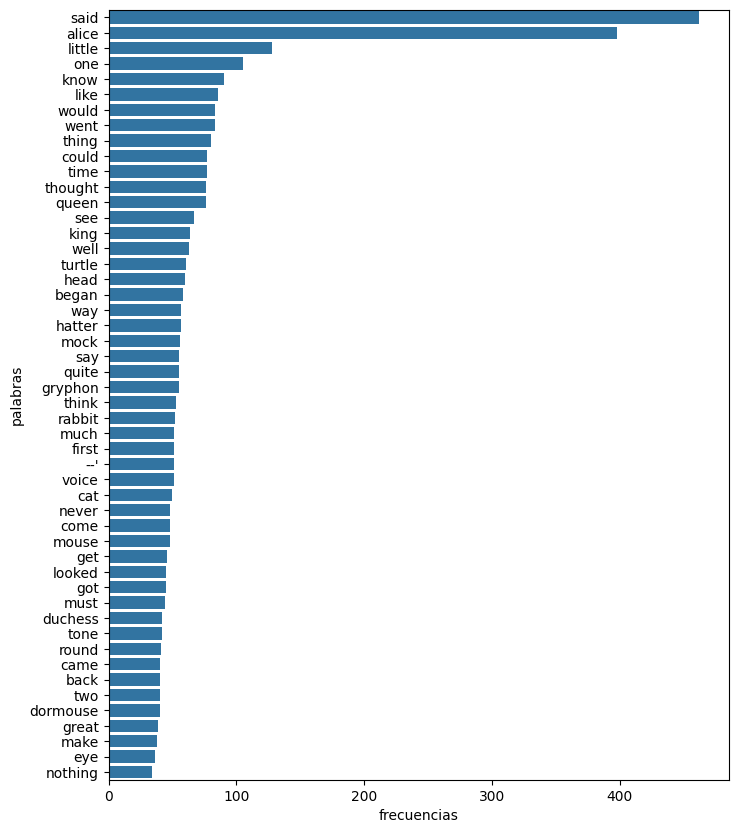

In [20]:
plt.figure(figsize=(8, 10))
sns.barplot(df_top_50, y="palabras", x="frecuencias",orient="y")
plt.show()

# **6. Nube de Palabras**

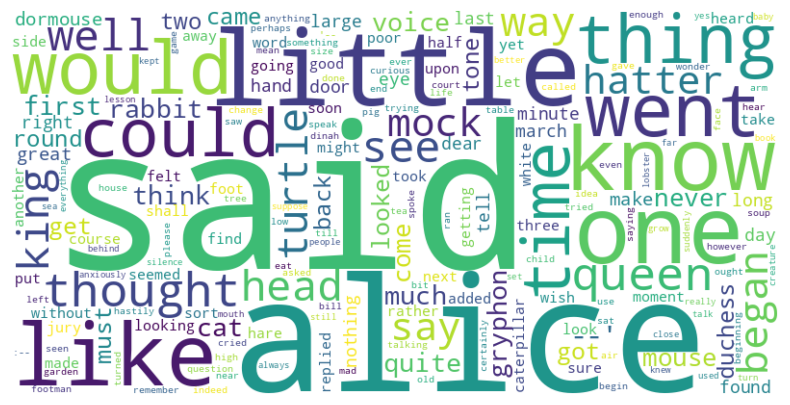

In [21]:
# Se crea la nube de palabras con las frecuencias calculadas
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(frecuencia_ordenada_diccionario)  # Utiliza las frecuencias calculadas previamente

#Para graficar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **7. Etiquetado POS**

pos_tag toma una lista de palabras (palabras_limpias), y devuelve una lista de las mismas palabras etiquetadas con un código de dos o tres letras que indica la parte del discurso. Estamos buscando sustantivos, que se etiquetarán con NN (sustantivos singulares o colectivos) o NNS (sustantivos plurales).

In [22]:
sample_words=palabras_limpias[:1500]
tagged_words = pos_tag(sample_words)
tagged_words[:100]

[('alice', 'JJ'),
 ('adventure', 'NN'),
 ('wonderland', 'NN'),
 ('lewis', 'VBZ'),
 ('carroll', 'NN'),
 ('1865', 'CD'),
 ('chapter', 'NN'),
 ('rabbit', 'NN'),
 ('hole', 'JJ'),
 ('alice', 'NN'),
 ('beginning', 'VBG'),
 ('get', 'VB'),
 ('tired', 'JJ'),
 ('sitting', 'VBG'),
 ('sister', 'JJ'),
 ('bank', 'NN'),
 ('nothing', 'NN'),
 ('twice', 'RB'),
 ('peeped', 'VBD'),
 ('book', 'NN'),
 ('sister', 'NN'),
 ('reading', 'VBG'),
 ('picture', 'NN'),
 ('conversation', 'NN'),
 ('use', 'IN'),
 ('book', 'NN'),
 ('thought', 'NN'),
 ('alice', 'NN'),
 ('without', 'IN'),
 ('picture', 'NN'),
 ('conversation', 'NN'),
 ('considering', 'VBG'),
 ('mind', 'NN'),
 ('well', 'NN'),
 ('could', 'MD'),
 ('hot', 'VB'),
 ('day', 'NN'),
 ('made', 'VBN'),
 ('feel', 'NN'),
 ('sleepy', 'JJ'),
 ('stupid', 'JJ'),
 ('whether', 'IN'),
 ('pleasure', 'NN'),
 ('making', 'VBG'),
 ('daisy', 'NN'),
 ('chain', 'NN'),
 ('would', 'MD'),
 ('worth', 'VB'),
 ('trouble', 'NN'),
 ('getting', 'VBG'),
 ('picking', 'VBG'),
 ('daisy', 'NN'),
 (

In [23]:
#Ahora filtramos los sustantivos:
sample_nouns = [ word for (word, pos) in tagged_words if (pos == 'NN' or pos == 'NNS')]
sample_nouns[:20]

['adventure',
 'wonderland',
 'carroll',
 'chapter',
 'rabbit',
 'alice',
 'bank',
 'nothing',
 'book',
 'sister',
 'picture',
 'conversation',
 'book',
 'thought',
 'alice',
 'picture',
 'conversation',
 'mind',
 'well',
 'day']

In [24]:
#Ahora filtramos los verbos:
sample_verbs = [ word for (word, pos) in tagged_words if (pos == 'VB' or pos == 'VBG' or pos == 'VBD')]
sample_verbs[:20]

['beginning',
 'get',
 'sitting',
 'peeped',
 'reading',
 'considering',
 'hot',
 'making',
 'worth',
 'getting',
 'picking',
 'ran',
 'occurred',
 'seemed',
 'took',
 'looked',
 'started',
 'take',
 'ran',
 'see']

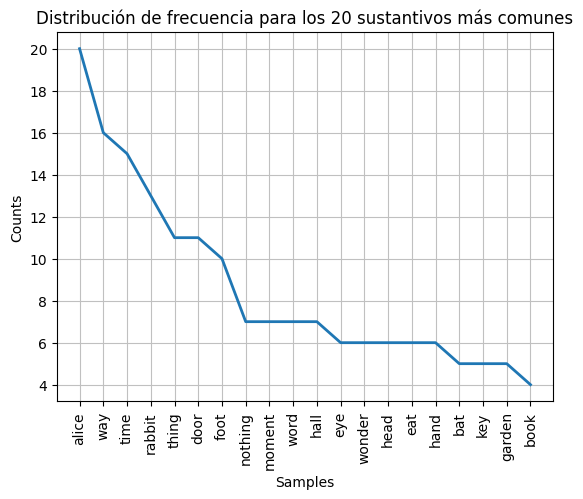

<Axes: title={'center': 'Distribución de frecuencia para los 20 sustantivos más comunes'}, xlabel='Samples', ylabel='Counts'>

In [25]:
#Graficamos la frecuencia, los 20 sustantivos más comunes :
freq_dist = nltk.FreqDist(sample_nouns)
freq_dist.plot(20, title="Distribución de frecuencia para los 20 sustantivos más comunes")

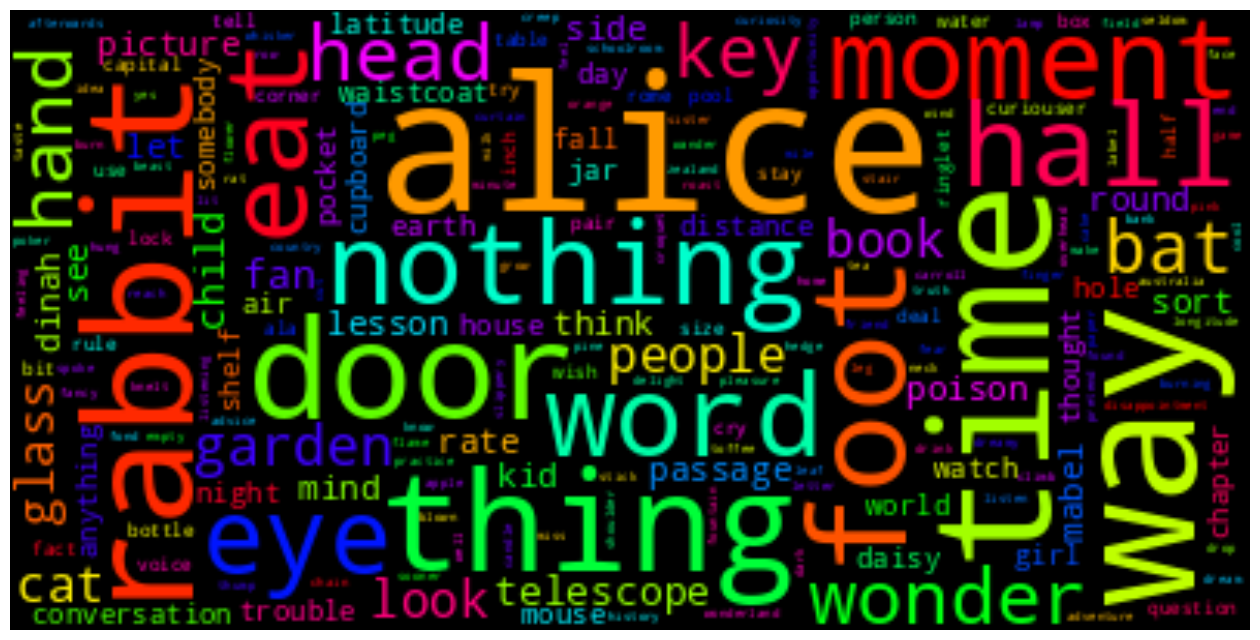

In [26]:
#Generamos una nube de palabras:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
cloud = WordCloud(max_font_size=60, colormap='hsv').generate(' '.join(sample_nouns))
plt.rcParams['figure.figsize'] = (16, 12)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

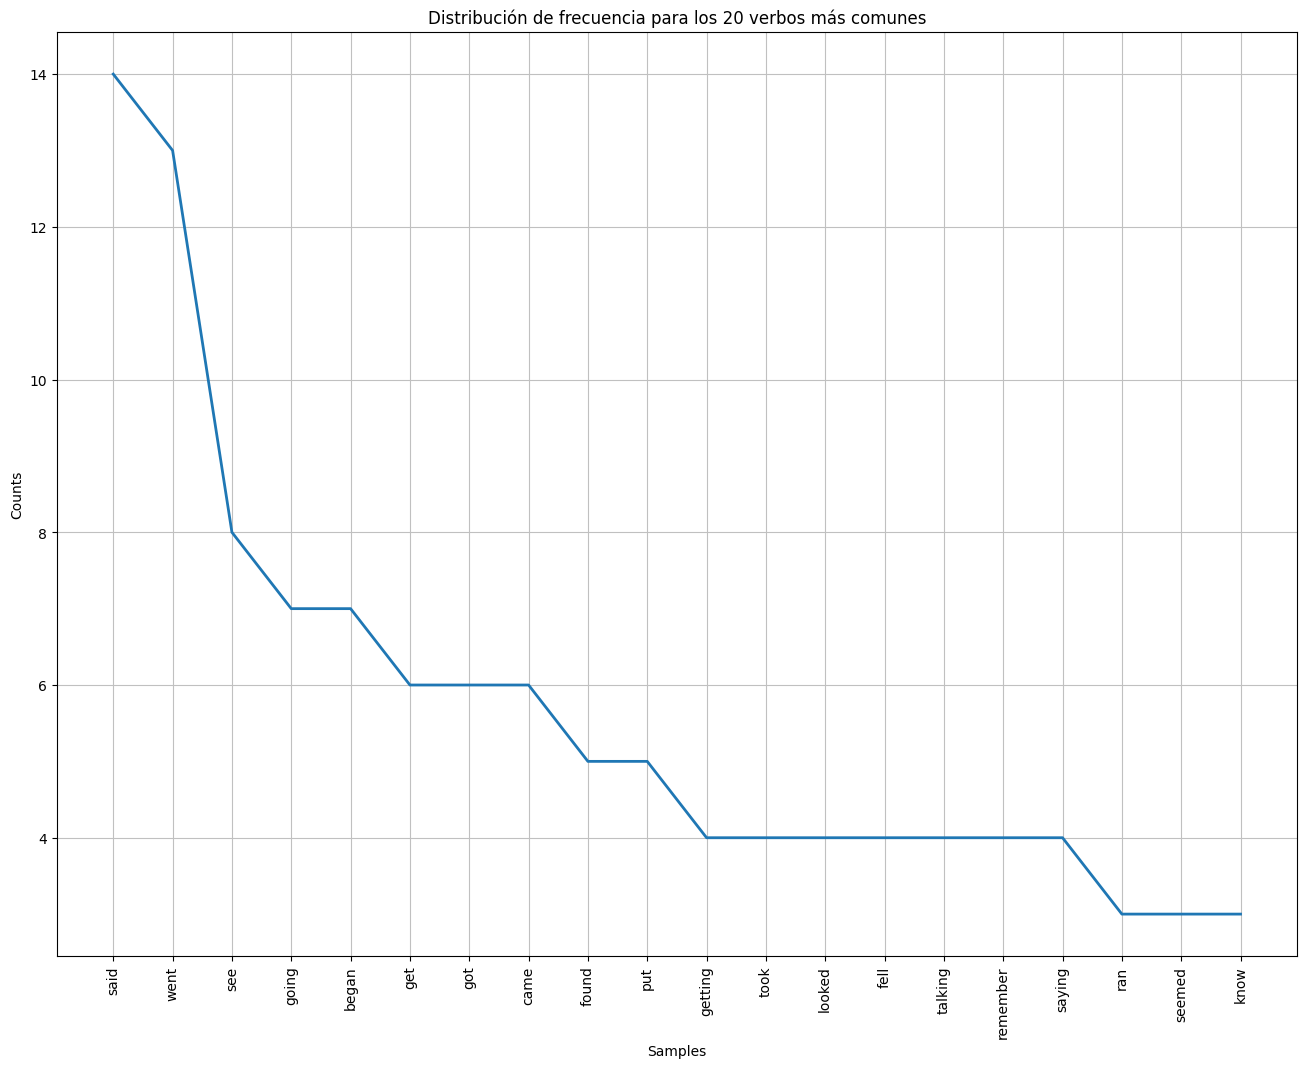

<Axes: title={'center': 'Distribución de frecuencia para los 20 verbos más comunes'}, xlabel='Samples', ylabel='Counts'>

In [27]:
freq_dist = nltk.FreqDist(sample_verbs)
freq_dist.plot(20, title="Distribución de frecuencia para los 20 verbos más comunes")

# **8. Detección de Entidades con Spacy**

Spacy asigna etiquetas a las entidades nombradas que identifica en el texto procesado. Estas representan diferentes tipos de entidades nombradas, algunas de las etiquetas comunes que Spacy puede asignar son las siguientes:

- PERSON: Nombres de personas.
- ORG: Nombres de organizaciones, como empresas, instituciones, etc.
- GPE: Nombres de países, ciudades, estados u otras divisiones geográficas.
- DATE: Fechas, incluyendo años, meses, días, etc.
- TIME: Horas, minutos, segundos, etc.
- MONEY: Cantidades de dinero.
- CARDINAL: Números cardinales, como números enteros y fracciones.
- PERCENT: Porcentajes.
- FAC: Nombres de edificios, aeropuertos, puentes, etc.
- LOC: Nombres de ubicaciones geográficas que no son países, ciudades, etc.
- MISC: Cuando SpaCy no puede clasificar una entidad nombrada en una de las categorías específicas.

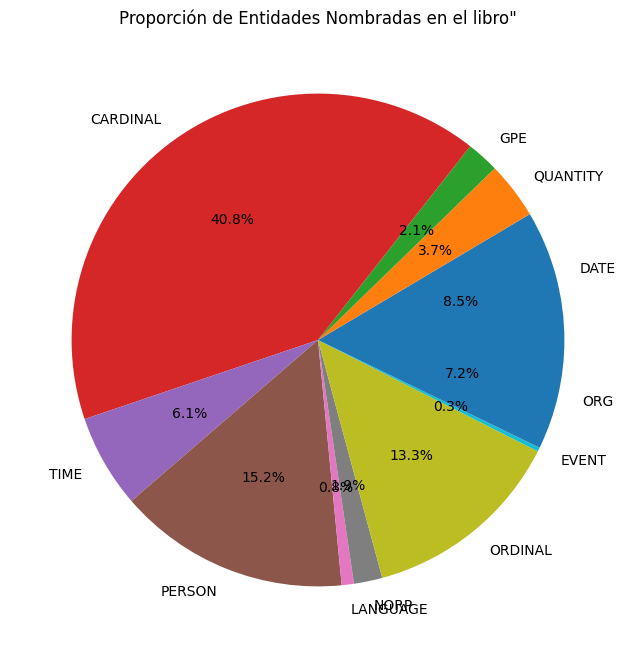

In [28]:
#Primero contamos la frecuencia de cada tipo de entidades:
palabras_limpias_entities = nlp(" ".join(palabras_limpias))
entidades = [entidad.label_ for entidad in palabras_limpias_entities.ents]
frecuencia_entidades = {entidad: entidades.count(entidad) for entidad in set(entidades)}

#Ahora creamos un gráfico de pastel para visualizar estas frecuencias
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_entidades.values(), labels=frecuencia_entidades.keys(), autopct='%1.1f%%')
plt.title('Proporción de Entidades Nombradas en el libro"')
plt.show()

Veamos los nombres propios que hay en el Libro y su frecuencia

In [29]:
#Primero tokenizamos el texto
tokens = word_tokenize(libro)
#Luego se etiquetan las partes del discurso de las palabras
tokens_etiquetados = nltk.pos_tag(tokens)
#Para identificar y agrupar las entidades nombradas en el texto
chunked = nltk.ne_chunk(tokens_etiquetados)
#nltk.ne_chunk() toma los tokens etiquetados y devuelve un árbol de fragmentos (chunk tree) donde las entidades están agrupadas con etiquetas como 'PERSON' (personas), 'ORGANIZATION' (organizaciones), 'LOCATION' (ubicaciones), etc.

personas  = []
for subtree in chunked:
    if isinstance(subtree, nltk.tree.Tree) and subtree.label() == 'PERSON':
        for token, pos_tag in subtree.leaves():
            personas.append(token)

print(personas)

['Lewis', 'Carroll', 'Alice', 'Alice', 'Which', 'Alice', 'Latitude', 'Latitude', 'Please', 'Down', 'Dinah', 'Dinah', 'Dinah', 'Alice', 'Rabbit', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Tears', 'Poor', 'Alice', 'Alice', 'Alice', 'Ada', 'Mabel', 'Geography', 'London', 'Mabel', 'How', 'Mabel', 'Mabel', 'Alice', 'Alice', 'O', 'Mouse', 'Latin', 'Grammar', 'William', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Edwin', 'Edwin', 'Edgar', 'Atheling', 'William', 'William', 'Shakespeare', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Crab', 'Crab', 'Alice', 'Dinah', 'Alice', 'Magpie', 'Alice', 'Dinah', 'Mary', 'Ann', 'Quick', 'Alice', 'Ann', 'Alice', 'Dinah', 'Miss', 'Alice', 'Dinah', 'Ann', 'Mary', 'Ann', 'Alice', 'Alice', 'Alice', 'Next', 'Pat', 'Pat', 'Bill', 'Bill', 'Bill', 'Bill', 'Bill', 'Bill', 'Bill', 'Alice', 'Bill', 'Bill', 'Bill', 'Brandy', 'Bill', 'Alice', 'Dinah', 'Alice', 'Alice', 'Alice', 'Lizard', 'Bill', 'Alice', 'Alice', 'Alic

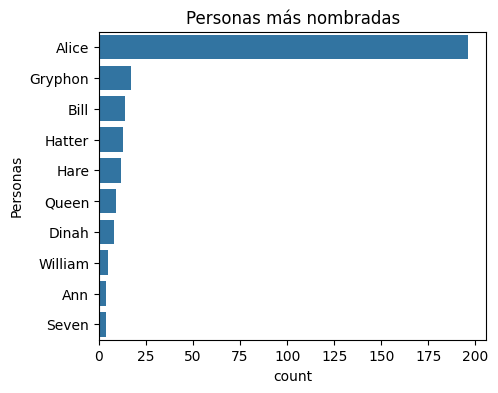

In [30]:
df_persons = pd.DataFrame(personas, columns=["Personas"])
df_persons
plt.figure(figsize=(5,4))
sns.countplot(y="Personas",
             data=df_persons,
             order=df_persons["Personas"].value_counts().iloc[:10].index)
plt.title("Personas más nombradas")
plt.show()

# **9. Análisis de Sentimiento**

El análisis de sentimiento permite determinar el tono emocional de un texto, ya sea positivo, negativo o neutro.  Es crucial para comprender el sentimiento que subyace a los datos de texto.

En "polaridad" indica lo positivo o negativo que es el texto (valores entre -1 y 1), mientras que el carácter "subjetividad". representa el carácter subjetivo del texto (valores entre 0 y 1).



In [31]:
def analisis_sentimiento(libro):
  texto = ' '.join(palabras_limpias)   #Textblob requiere que el texto esté en cadena string.
  blob = TextBlob(texto)
  polarity = blob.sentiment.polarity
  subjectivity = blob.sentiment.subjectivity

  if polarity > 0:
    sentimiento = "Positivo"
  elif polarity < 0:
    sentimiento = "Negativo"
  else:
    sentimiento = "Neutral"

  if subjectivity > 0.5:
    subjetividad = "Subjetivo"
  else:
    subjetividad = "Objetivo"

  print(f'Polaridad {polarity}')
  print(f'Sentimiento {sentimiento}')

  print(f'Subjetividad {subjectivity}')
  print(f'Sentimiento {subjetividad}')

analisis_sentimiento(libro)

Polaridad 0.04534822956197765
Sentimiento Positivo
Subjetividad 0.5041120589499196
Sentimiento Subjetivo
